In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [3]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Thecleverprogrammer.csv")
print(data.head())


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [4]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


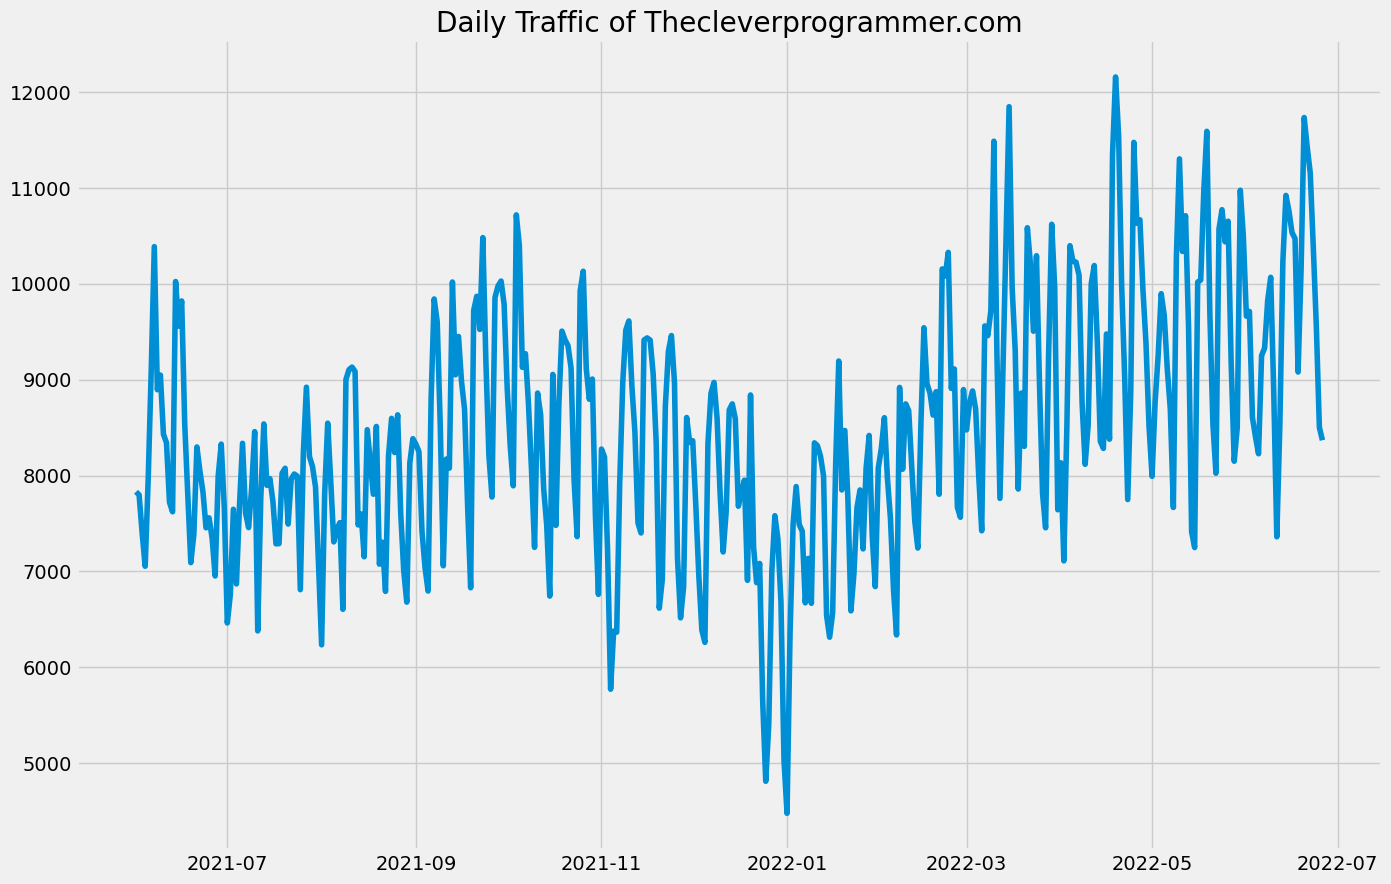

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


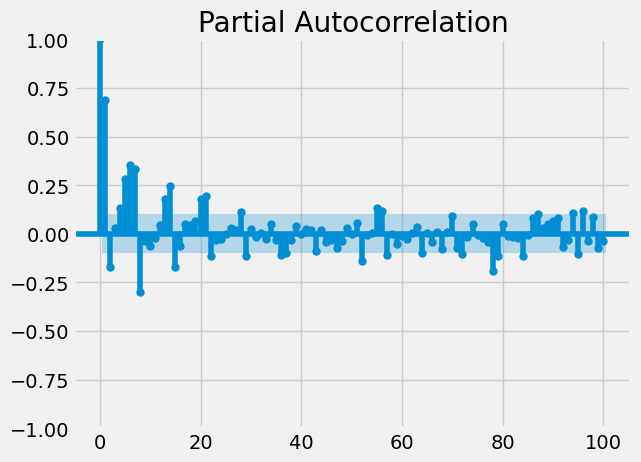

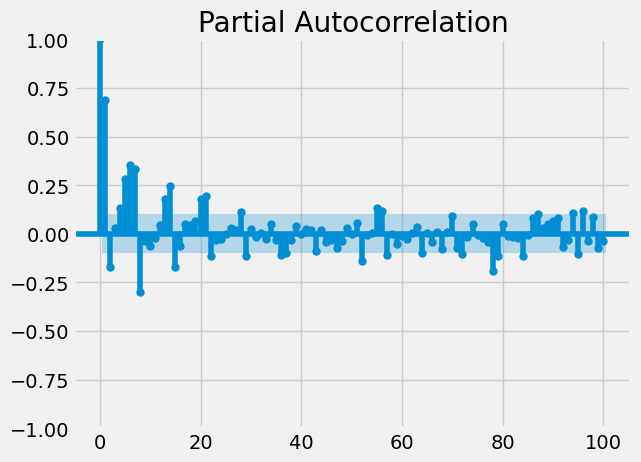

In [10]:
plot_pacf(data["Views"], lags = 100)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

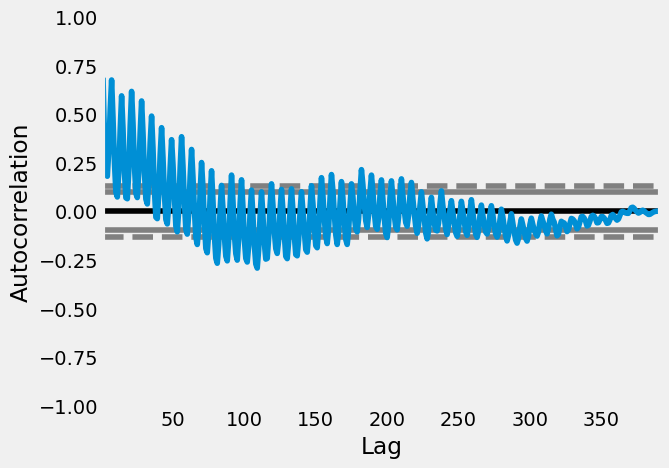

In [11]:
pd.plotting.autocorrelation_plot(data["Views"])


In [13]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.384
Date:                            Wed, 29 Mar 2023   AIC                           6228.767
Time:                                    12:04:41   BIC                           6287.791
Sample:                                         0   HQIC                          6252.193
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7741      0.133      5.818      0.000       0.513       1.035
ar.L2         -0.8014      0.134   

In [14]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)


391     9868.909295
392    10805.046933
393    10766.038446
394     9859.283264
395     8778.034770
396     8239.228083
397     8934.584828
398     9695.820646
399    10274.661586
400    10624.417875
401     9862.215596
402     9363.863193
403     9044.744465
404     9080.484115
405    10540.331746
406    11007.542215
407    10902.715515
408    10096.315392
409     9458.082171
410     8636.367819
411     9179.038200
412    10392.809252
413    10607.550379
414    10793.432823
415    10267.957414
416     9463.185503
417     9046.771292
418     9168.353819
419     9901.047321
420    10238.227660
421    10723.522767
422     9911.755202
423     9555.341070
424     9064.327093
425     8824.538751
426    10136.827174
427    10845.370188
428    10906.701309
429    10411.233376
430     9456.642283
431     8695.074684
432     8718.114359
433    10061.516282
434    10508.256621
435    10841.522926
436    10489.121311
437     9349.539788
438     9185.652485
439     9361.751776
440    10298.553119


<AxesSubplot:>

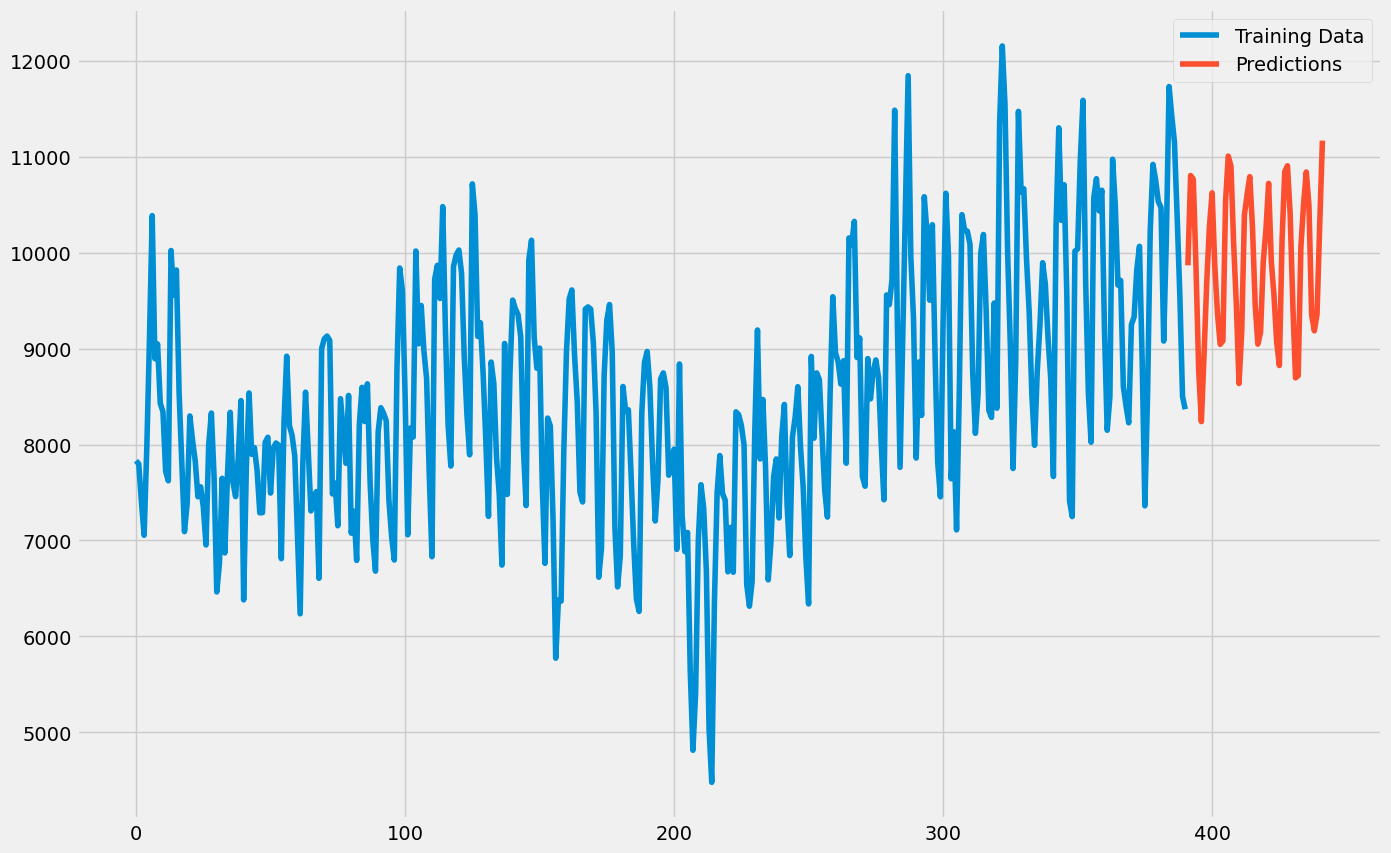

In [15]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")